In [1]:
#環境
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import kurtosis, skew

In [2]:
import os

In [3]:
pwd

'/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK3/授業課題'

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

### 【問題1】コンペティション内容の把握

コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？

**1. Home Creditはどのような企業？**

金融業：貸し借りの事業

企業概要・ビジョン：Home Credit社は、前向きで安全な借入体験を提供することにより、銀行口座を持たない人々の金融包摂を拡大するよう努めています。金融サービスの行き届いていない人々が前向きなローン経験を持っていることを確認するために、Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測します。

**2. このコンペティションでは何を予測する？**

クライアントの返済能力を予測>Home Creditは現在、これらの予測を行うためにさまざまな統計的手法と機械学習的手法を使用していますが、Kagglersがデータの可能性を最大限に引き出す手助けをするように挑戦しています。そうすることで、返済が可能なクライアントが拒否されないようにし、クライアントに適した元本、満期、および返済カレンダーを用意してローンが組めるようにします。

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

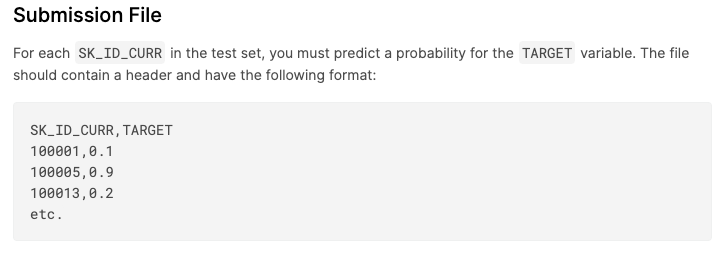

# 新しい語彙：
### 混同行列（Confusion Matrix）:

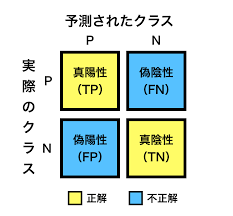

## ROC曲線(Receiver Operating Characteristic Curve)

### グラフについて：
ROC 曲線は真陽性率(TP)や真陰性率(TN)を組み合わせて作成した曲線です。
False Positive Rate（偽陽性率）を横軸にTrue Positive Rate（真陽性率）を縦軸に置いてプロットしたものがROC曲線です。

面積＝最大１、最小０で真陽性率(TP)と真陰性率(TN)の比率をグラフ化したものであり、曲線の下にある面積がTPの率を表している。

下記のグラフでは以下のことが言える：

-　黒線は、ランダムに推測した場合で期待される結果
<br>
-　青線は、赤線よりTPの比率が高く、より良いモデルの結果を示している。

https://www.randpy.tokyo/entry/roc_auc
<br>
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction


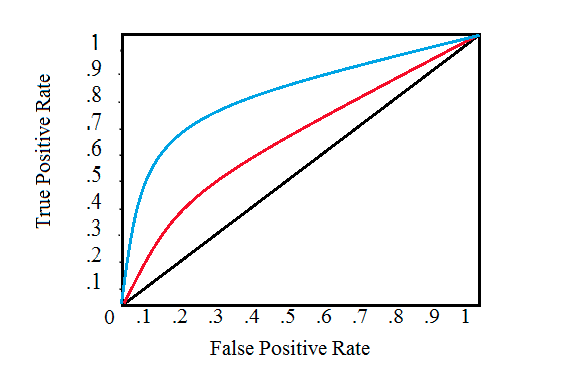

### x軸「偽陽性率」とy軸「真陽性率」について：
正解率=(TP+TN)/(TP+FP+FN+TN)という式で計算することができます。（分母が全体の数、分子が正解した数）

正解率を評価指標として用いるのが直感的には良さそうではあるのですが、クラスに偏りがある場合、機能しなくなるという問題があります。


この表を使って下の2つの指標を算出してみたいと思います。

- False Positive Rate(偽陽性率）：FP（Fであるのに正と予測）/(FP+TN)
「偽陽性率」は、『正解データ負』であるものを間違って『正』と予測した割合。(**分母が負の総和**)

- True Positive Rate(真陽性率）：TP/(TP+FN（TであるのにFと予測した）)
「真陽性率」は、正解データ正であるものを正しく正と予測した割合。(**分母が正の総和**)

**上記の２つを合わせるとサンプル数（n）の挿話となる**

確率論的に考えると４つの独立したカテゴリー変数が存在し、各々のカテゴリーの確率は＞カテゴリー数/サンプル数
それらを上から
カテゴリー変数の数のサイズの行列になる＞n*n


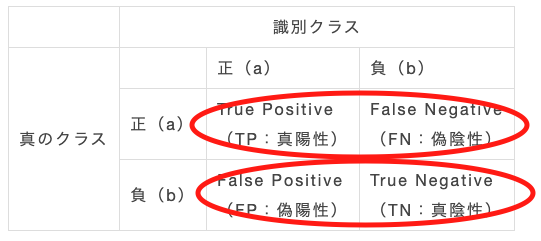

3. それを予測することで企業が得られるメリットは何？

顧客獲得：通常のプロセスで棄却されそうな顧客でも、特性を理解することで、顧客として受け入れられるように制度の正しいローン申請・評価をできるようにする＞返済が可能なクライアントが拒否されないようにし、クライアントに適した元本、満期、および返済カレンダーを用意してローンが組めるようにします。

In [5]:
#Kaggleデータのダウンドード

credit_df = pd.read_csv('application_train.csv')

### 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください

In [6]:
#Inspect headings
credit_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [7]:
#See data types of all columns
credit_df.info(122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Descriptive Stats
credit_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [47]:
os.listdir()

['WEEK 3 CLASS EX. 1 - Home Credit Default Risk コンペティション.ipynb',
 '.DS_Store',
 'application_train.csv.zip',
 '機械学習エンジニアコース_Week3_EDA.pdf',
 'HomeCredit_columns_description.xlsx',
 'application_train.csv',
 'HomeCredit_columns_description_v2.csv',
 'HomeCredit_columns_description_kaggle.csv',
 '.ipynb_checkpoints']

In [48]:
# Load Description of Application Data Set
description_df = pd.read_csv('HomeCredit_columns_description_v2.csv')
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
description_df.head(250)

,Unnamed: 0,Table,Row,Description,Special,説明
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN,私たちのサンプル中のローンのID
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN,ターゲット変数（1 - 支払が困難なクライアント：彼/彼女は私たちのサンプル、0でローンの...
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN,識別ローンは、現金または回転であれば
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN,クライアントの性別
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN,フラグクライアントが車を所有している場合
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN,旗クライアントは、家やフラットを所有している場合
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN,子供の人数クライアントが持っています
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN,クライアントの収入
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN,ローンの与信額
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN,ローン年金


In [10]:
# Percentage of null
null_n = credit_df.isnull().sum()
total_n = len(credit_df)

null_percentage = null_n / total_n
null_percentage

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [11]:
#See value counts for each target variable
credit_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

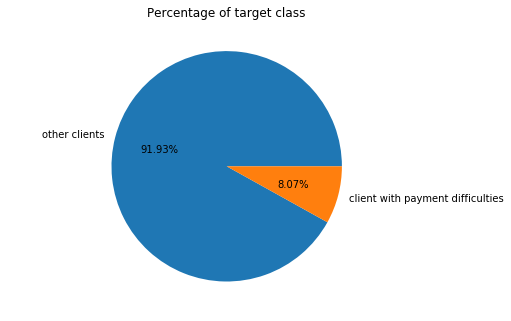

In [13]:
#Plot pie chart of target class - Matplotlib

#Create array for matplotlib processing
target_array = np.array(credit_df['TARGET'].value_counts())

#confirgue plot so it's straight
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

#plot pie chart
plt.title("Percentage of target class")
plt.pie(target_array, labels=['other clients', 'client with payment difficulties'], autopct='%1.2f%%')
plt.show()

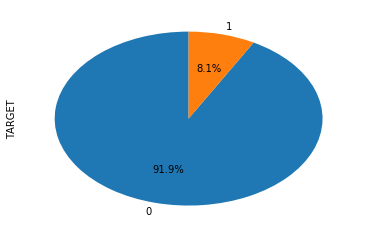

In [14]:
#Plot pie chart of target class - Pandas Plot Method
credit_df['TARGET'].value_counts().plot(kind='pie', startangle=90, autopct="%1.1f%%")

### 【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください

1. ラベル1に属する人の特徴量を理解->label 1と特徴量の相関関係
2. ラベル0に属する人の特徴量を理解->label 0と特徴量の相関関係

In [15]:
#Create dataframes for both target variables
df_target_zeros = credit_df[credit_df['TARGET'] == 0]
df_target_one = credit_df[credit_df['TARGET'] == 1]

#Inspect dataframe
df_target_zeros.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0

In [16]:
#Inspect dataframe
df_target_one.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,...,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,...,0.1322,0.1250,0.9960,0.9463,0.0827,0.16,0.1379,0.2500,0.2917,0.0144,0.1077,0.1290,0.0039,0.0079,org spec account,block of flats,0.1463,"Stone, brick",No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,NaN,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.468208,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,

In [17]:
#Inspect descriptive statistics for dataframe zero
df_target_zeros.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,97006.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282684.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,124079.000000,2.820780e+05,227398.000000,140910.000000,118781.000000,146487.000000,95949.000000,86244.000000,133710.000000,142069.000000,143730.000000,92052.000000,116200.000000,90609.000000,142447.000000,87499.000000,128334.000000,140910.000000,118781.000000,146487.000000,95949.000000,...,90609.000000,142447.000000,87499.000000,128334.000000,140910.000000,118781.000000,146487.000000,95949.000000,86244.000000,133710.000000,142069.000000,143730.000000,92052.000000,116200.000000,90609.000000,142447.000000,87499.000000,128334.000000,147961.000000,281701.000000,281701.000000,281701.000000,281701.000000,282685.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,-16138.176397,65696.146123,-5029.941065,-3017.219788,11.935540,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.224090,0.175856,0.511461,5.234787e-01,0.520969,0.118314,0.088952,0.977893,0.753153,0.045005,0.080194,0.150249,0.228023,0.233370,0.066575,0.101405,0.108400,0.008850,0.028615,0.115036,0.088001,0.977225,0.760297,...,0.106268,0.106916,0.008096,0.027265,0.118721,0.088448,0.977916,0.756426,0.044980,0.079317,0.149735,0.227634,0.233097,0.067422,0.102582,0.109615,0.008687,0.028490,0.103507,1.415742,0.139148,1.398923,0.096688,-976.388294,0.000032,0.704060,0.000088,0.015126,0.090457,0.000198,0.082027,0

In [18]:
#Inspect descriptive statistics for dataframe one
df_target_one.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,7576.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.00000,24825.000000,10054.000000,24773.000000,19148.000000,10540.000000,8787.000000,11017.000000,7074.000000,6402.000000,9910.000000,10614.000000,10761.000000,6817.00000,8721.000000,6703.000000,10714.000000,6498.000000,9495.000000,10540.000000,8787.000000,11017.000000,7074.000000,...,6703.000000,10714.000000,6498.000000,9495.000000,10540.000000,8787.000000,11017.000000,7074.000000,6402.000000,9910.000000,10614.000000,10761.000000,6817.000000,8721.000000,6703.000000,10714.000000,6498.000000,9495.000000,11119.000000,24789.000000,24789.000000,24789.000000,24789.000000,24825.000000,24825.000000,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.0,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,-4487.127009,-2732.099617,13.668691,1.0,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269,2.153635,2.134824,11.797100,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672,0.386968,0.410935,0.390717,0.105766,0.081548,0.975634,0.743231,0.039444,0.062036,0.142707,0.203021,0.21196,0.063108,0.092255,0.094096,0.008252,0.024887,0.103463,0.081359,0.974938,0.750688,...,0.097226,0.093461,0.007812,0.023739,0.106211,0.081283,0.975570,0.746532,0.039404,0.061352,0.142227,0.202692,0.211754,0.063793,0.093478,0.095206,0.008171,0.024796,0.089769,1.496147,0.191980,1.477672,0.138247,-808.796818,0.000161,0.777925,0.0,0.014985,0.060705,0.000121,0.073958,0.002981,0.0,0.003021,0.0,0.001208,0.001208,0.000443,0.006042,0.000081,0.005720,0.000483,0.000524,0.000564,0.006672,0.008036,0.034919,0.227926,0.

### 【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [19]:
#1　df間の記述統計の差を平均値で探求
movements = (df_target_zeros.describe()-df_target_one.describe())/df_target_one.describe()
movements

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10.387150,10.38715,10.387150,10.387150,10.387150,10.386667,10.386430,10.387150,10.387150,10.387150,10.387150,10.387150,11.804382,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387069,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,11.341257,10.386510,10.875809,12.369070,12.517810,12.296451,12.563613,12.471415,12.492432,12.385057,12.356565,12.503301,12.324160,12.517679,12.295408,12.465528,12.515956,12.369070,12.517810,12.296451,12.563613,...,12.517679,12.295408,12.465528,12.515956,12.369070,12.517810,12.296451,12.563613,12.471415,12.492432,12.385057,12.356565,12.503301,12.324160,12.517679,12.295408,12.465528,12.515956,12.307042,10.363952,10.363952,10.363952,10.363952,10.387110,10.387150,10.387150,10.38715,10.387150,10.387150,10.387150,10.387150,10.387150,10.38715,10.387150,10.38715,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.387150,10.954366,10.954366,10.954366,10.954366,10.954366,10.954366
mean,0.002867,-1.00000,-0.109660,0.020928,0.080444,0.025749,0.109954,0.098800,0.084203,0.549632,0.120971,0.104359,-0.126797,-0.000004,-0.073749,-0.175900,-0.000059,0.160368,0.026975,-0.014265,-0.051103,-0.052639,0.024557,-0.143315,-0.100052,-0.048053,-0.369525,-0.260236,-0.206683,0.321714,0.273872,0.333368,0.118633,0.090795,0.002315,0.013350,0.140986,0.292703,0.052849,0.123151,0.101008,0.054948,0.099180,0.152007,0.072417,0.149765,0.111857,0.081639,0.002347,0.012800,...,0.092992,0.143963,0.036348,0.148520,0.117782,0.088151,0.002406,0.013253,0.141505,0.292823,0.052788,0.123052,0.100791,0.056892,0.097388,0.151348,0.063067,0.149013,0.153037,-0.053742,-0.275199,-0.053292,-0.300616,0.207211,-0.802409,-0.094951,inf,0.009438,0.490114,0.639275,0.109112,0.333889,inf,0.320787,inf,2.085349,1.555512,1.882036,0.699577,2.512731,0.458278,0.251411,-0.033999,-0.441727,-0.043809,-0.139658,-0.017300,0.187654,0.023143,-0.068802
std,0.004324,NaN,-0.050284,-0.852043,0.174385,0.177310,0.199428,0.174137,0.040869,0.195784,0.072376,-0.006830,-0.048621,inf,0.193673,-0.067637,0.015999,0.048788,0.012578,-0.046612,0.006674,0.004125,-0.006432,-0.073268,-0.048555,-0.023299,-0.

In [20]:
#1　df間の平均値の差を(+20%)で可視化
vals_plus = movements.loc['mean'] >= 0.2 

print(type(vals_plus))
print(len(vals_plus))
print(vals_plus)
variable_list_pos = []

for i in range(len(vals_plus)):
    if vals_plus[i] == True:
        variable_list_pos.append(vals_plus.index[i])

print(variable_list_pos)

<class 'pandas.core.series.Series'>
106
SK_ID_CURR                    False
TARGET                        False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Name: mean, Length: 106, dtype: bool
['DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19']


In [21]:
#1　df間の平均値の差を(-20%)で可視化
vals = movements.loc['mean'] <= -0.2
print(type(vals))
print(len(vals))
print(vals)
variable_list_neg = []

for i in range(len(vals)):
    if vals[i] == True:
        variable_list_neg.append(vals.index[i])

print(variable_list_neg)

<class 'pandas.core.series.Series'>
106
SK_ID_CURR                    False
TARGET                         True
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Name: mean, Length: 106, dtype: bool
['TARGET', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_21']


In [22]:
print(len(credit_df.columns) - (len(vals_plus)))
#122-106=16が文字データ

16


### #1 df間の記述統計の差を平均値で探求して、大きな違いのある特徴量を抽出

- 目的変数[0, 1]のdf間においてプラマイ２０％より大きな差をもつ特徴量を上記のリストに格納した。
- ただし、上記の結果は文字列・ラベル変数を取り扱っていない点に注意しなければならない。16個のラベル変数は、以降の考察で分析を試みる。

In [23]:
#2 DAYS_EMPLOYEDの変数では、目的変数[0, 1]のdf間にどのような相違点があるのか？
df_target_zeros['DAYS_EMPLOYED'].describe()

count    282686.000000
mean      65696.146123
std      142877.810161
min      -17912.000000
25%       -2813.000000
50%       -1235.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [24]:
#2 DAYS_EMPLOYEDの変数では、目的変数[0, 1]のdf間にどのような相違点があるのか？
df_target_one['DAYS_EMPLOYED'].describe()

count     24825.000000
mean      42394.675448
std      119484.634253
min      -16069.000000
25%       -2156.000000
50%       -1034.000000
75%        -379.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


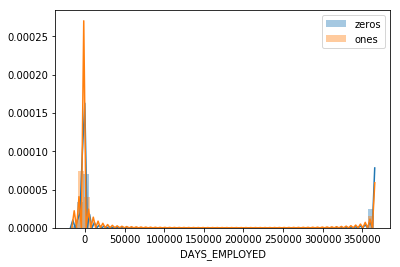

In [25]:
sns.distplot(df_target_zeros['DAYS_EMPLOYED'], label='zeros')
sns.distplot(df_target_one['DAYS_EMPLOYED'], label='ones')
plt.legend()
plt.show()

### #2 DAYS_EMPLOYEDの変数では、目的変数[0, 1]のdf間にどのような相違点があるのか？

- max value impacting the analysis -> appears these outliers have no meaningful value to analysis
    - decision to exclude as both target categories are impacted
    > 外れ値を除外して分析を再開する
    

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


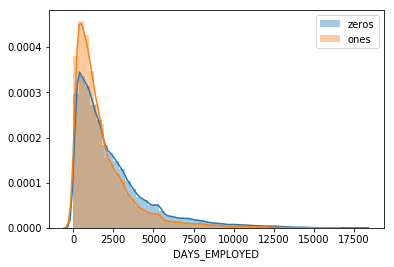

In [26]:
#3 外れ値を除外したDAYS_EMPLOYEDの変数では、目的変数[0, 1]のdf間の分布にはどのような違いが見られるのか？
df_target_zerosv2 = df_target_zeros[df_target_zeros['DAYS_EMPLOYED'] <= 50000]*-1 #times by -1 to flip day count to positive
df_target_onesv2 = df_target_one[df_target_one['DAYS_EMPLOYED'] <= 50000]*-1

sns.distplot(df_target_zerosv2['DAYS_EMPLOYED'], label='zeros')
sns.distplot(df_target_onesv2['DAYS_EMPLOYED'], label='ones')
plt.legend()
plt.show()


In [27]:
print("df0=歪度={:.2f}  尖度={:.2f}".format(df_target_zerosv2['DAYS_EMPLOYED'].skew(), df_target_zerosv2['DAYS_EMPLOYED'].kurtosis()))
print("df1=歪度={:.2f}  尖度={:.2f}".format(df_target_onesv2['DAYS_EMPLOYED'].skew(), df_target_onesv2['DAYS_EMPLOYED'].kurtosis()))

df0=歪度=1.93  尖度=4.55
df1=歪度=2.33  尖度=7.21


### #3 外れ値(-DAYS)を除外したDAYS_EMPLOYEDの変数では、目的変数[0, 1]のdf間の分布にはどのような違いが見られるのか？

- df1『支払が困難なクライアント』の分布はdf0『他のすべての場合』の分布に比べて就業日数が短く、尖度が０付近の値で強調されていることがうかがえる。『支払が困難なクライアント』の就業日数が比較的短いのは、クレジットの予測に有用な特徴量として観れる。

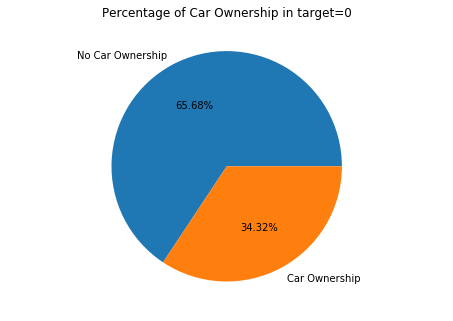

In [28]:
#4 CATEGORICAL DATA ANALYSIS 1 - FLAG_OWN_CAR　車保有率の差

target_array2 = np.array(df_target_zeros['FLAG_OWN_CAR'].value_counts())

#confirgue plot so it's straight
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

#plot pie chart
plt.title("Percentage of Car Ownership in target=0")
plt.pie(target_array2, labels=['No Car Ownership', 'Car Ownership'], autopct='%1.2f%%')
plt.show()

In [29]:
#check labels
df_target_zeros['FLAG_OWN_CAR'].value_counts()

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

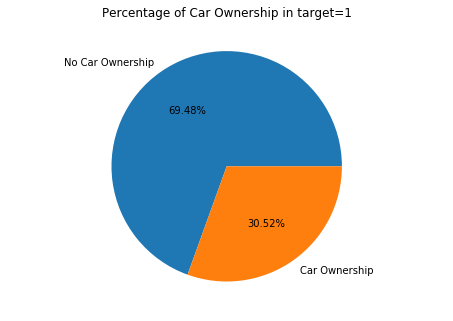

In [30]:
#4 CATEGORICAL DATA ANALYSIS 1 - FLAG_OWN_CAR　車保有率の差
target_array3 = np.array(df_target_one['FLAG_OWN_CAR'].value_counts())

#confirgue plot so it's straight
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

#plot pie chart
plt.title("Percentage of Car Ownership in target=1")
plt.pie(target_array3, labels=['No Car Ownership', 'Car Ownership'], autopct='%1.2f%%')
plt.show()

In [31]:
#check labels
df_target_one['FLAG_OWN_CAR'].value_counts()

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

### #4 CATEGORY DATA - FLAG_OWN_CAR　車保有率の差

- グループ１(69%v31%)・２(66%v34%)の結果にはそれほど大きな差が見られなかった
- 分析結果：車社会のイメージなのに、車の保有率はかなり低いようにうかがえる

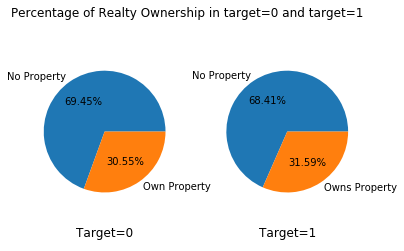

In [35]:
#5 CATEGORICAL DATA ANALYSIS 2 - FLAG_OWN_REALTY　住宅保有率の差

target_array4 = np.array(df_target_zeros['FLAG_OWN_REALTY'].value_counts())
target_array5 = np.array(df_target_one['FLAG_OWN_REALTY'].value_counts())


#confirgue plot so it's straight
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.axis('equal')
ax2.axis('equal')

#plot pie chart
plt.title("Percentage of Realty Ownership in target=0 and target=1", loc='right')
ax1.set_title("Target=0", y=-0.01)
ax2.set_title("Target=1", y=-0.01)
ax1.pie(target_array4, labels=['No Property', 'Own Property'], autopct='%1.2f%%')
ax2.pie(target_array5, labels=['No Property', 'Owns Property'], autopct='%1.2f%%')
plt.show()

### #5 CATEGORY DATA - FLAG_OWN_REALTY　住宅保有率の差

- グループ１(69%v31%)・２(68%v32%)の結果にはそれほど大きな差が見られなかった
- 上記同様、住宅保有率は貸金の返済能力とそれほど関係がないようにうかがえる＞保有は資産としての保有ではなくおそらくローンが組まれている。資産総額の記入に関しても検証する

In [87]:
#6 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION

#Select df for specific dtypes
temp = credit_df.select_dtypes('object')


#Select columns 
temp2 = credit_df.select_dtypes('object').columns.tolist()
list_categorical_data = []

temp2

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

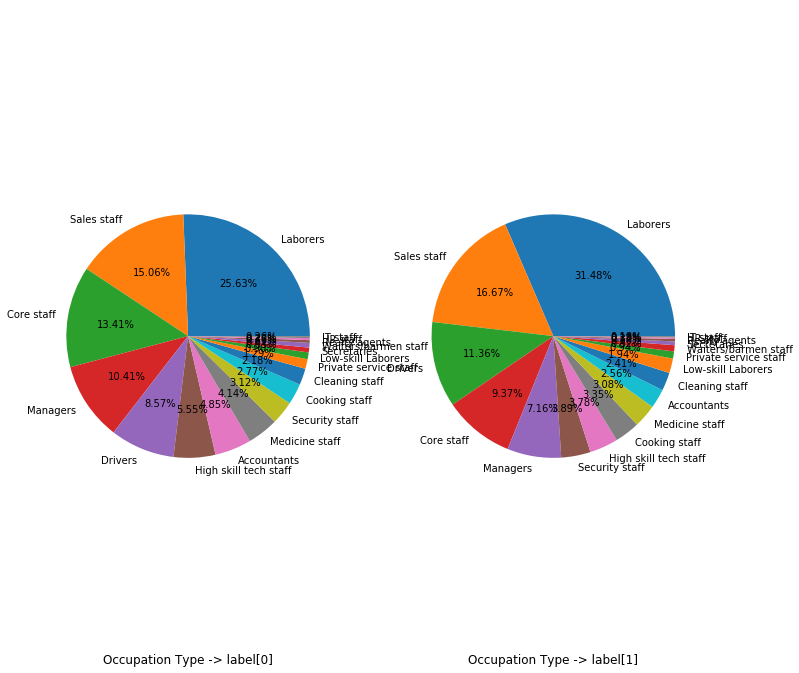

In [138]:
#6 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION - Matplotlib

#subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
ax1.axis('equal')
ax2.axis('equal')

#chart
ax1.set_title('Occupation Type -> label[0]', y=-0.01)
ax1.pie(array_zero, labels=labels0, autopct='%1.2f%%')
ax2.set_title('Occupation Type -> label[1]', y=-0.01)
ax2.pie(array_one, labels=labels1, autopct='%1.2f%%')
plt.show()

### #6 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION

- 目的変数間の職種に関する一番大きな違いは、ラベル１では管理職の人が比率が低かった
- 目的変数間の職種に関する一番大きな違いは、ラベル０ではドライバー・労働者の人が比率が高かった

特徴量のカテゴリーが多すぎるので、データーラングリングでOTHERのカテゴリーを作ってみる

In [110]:
#7 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION - DATA WRANGLING TO CREATE OTHER CATEGORY

array_zero = np.array(df_target_zeros['OCCUPATION_TYPE'].value_counts())
array_one = np.array(df_target_one['OCCUPATION_TYPE'].value_counts())
labels0 = df_target_zeros['OCCUPATION_TYPE'].value_counts().index.tolist()
labels1 = df_target_one['OCCUPATION_TYPE'].value_counts().index.tolist()

In [132]:
#7 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION - DATA WRANGLING TO CREATE OTHER CATEGORY
array_zero = np.array(df_target_zeros['OCCUPATION_TYPE'].value_counts())
array_one = np.array(df_target_one['OCCUPATION_TYPE'].value_counts())

array_zero_top8 = array_zero[:9]
array_zero_rest = np.array([array_zero[9:].sum()])
array_one_top8 = array_one[:9]
array_one_rest = np.array([array_one[9:].sum()])

combine_zero = np.concatenate((array_zero_top8, array_zero_rest), axis=0)
combine_one = np.concatenate((array_one_top8, array_one_rest), axis=0)

labels0 = df_target_zeros['OCCUPATION_TYPE'].value_counts().index.tolist()
labels1 = df_target_one['OCCUPATION_TYPE'].value_counts().index.tolist()

other = ['Other']
label_update0 = labels0[:9] + other
label_update1 = labels1[:9] + other
label_update

['Laborers',
 'Sales staff',
 'Core staff',
 'Managers',
 'Drivers',
 'High skill tech staff',
 'Accountants',
 'Medicine staff',
 'Security staff',
 'Other']

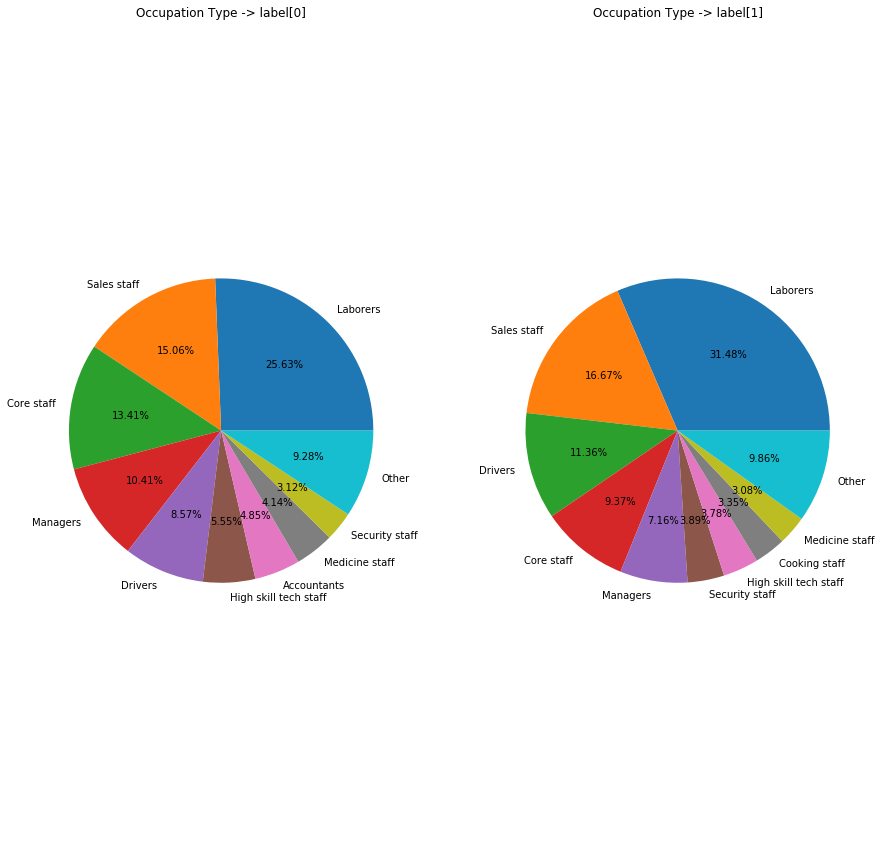

In [139]:
#7 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION - DATA WRANGLING TO CREATE OTHER CATEGORY - Matplotlib

#subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.axis('equal')
ax2.axis('equal')

#chart
ax1.set_title('Occupation Type -> label[0]')
ax1.pie(combine_zero, labels=label_update0, autopct='%1.2f%%')
ax2.set_title('Occupation Type -> label[1]')          
ax2.pie(combine_one, labels=label_update1, autopct='%1.2f%%')
plt.show()

### #7 CATEGORICAL DATA ANALYSIS 3 - TYPE OF OCCUPATION
- 特徴量のカテゴリーが少なくなったことで、グラフの数値の可視化に成功した。
- 会計士のカテゴリーがラベル１のグループにはOTHERに分類されたことが見えた＞どちらかというと高収入な職種


In [39]:
# 8) Pearson's correlation coefficient vs target

correlations = credit_df.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


### #8 Pearson's correlation coefficient vs target

- ＋の相関を表している特徴量のうち、年齢がもっとも目的変数と相関が高いことが示された。
- ーの相関を表している特徴量のうち、EXT_SOURCE_3がもっとも目的変数と相関が高いことが示された。EXT_SOURCE_3/2/1は、『外部データソースからの正規化スコア』と記述されているが、その詳細に関しては現時点では把握できていない。

In [69]:
# 9）DAYS_BIRTH Client's age in days at the time of application

age_zero = df_target_zeros[df_target_zeros['DAYS_BIRTH'] < 0]
age_zero_array = np.array(age_zero['DAYS_BIRTH'])/-365

age_one = df_target_one[df_target_one['DAYS_BIRTH'] < 0]
age_one_array = np.array(age_one['DAYS_BIRTH'])/-365


/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


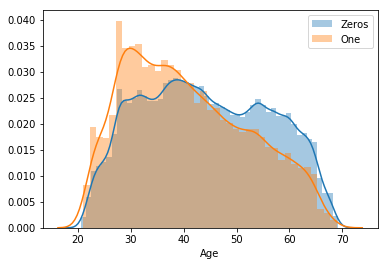

In [84]:
sns.distplot(age_zero_array, axlabel="Age", label="Zeros")
sns.distplot(age_one_array, axlabel="Age", label="One")
plt.legend()
plt.show()

### #9 目的変数間にDAYS_BIRTH（年齢）の違いがあるのか？

- 若年層の方が、少しではあるものの返済の延滞に直面している傾向がうかがえる

In [61]:
#10 返済に困難なクライアントのDAYS_BIRTHの違いを年齢層に分けてさらに可視化する

age_data = credit_df[['TARGET', 'DAYS_BIRTH']] #credit_df.loc[:, ('TARGET', 'DAYS_BIRTH')]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/-365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))
age_data.head(10)

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(20.0, 30.0]"
1,0,-16765,45.931507,"(40.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 60.0]"
3,0,-19005,52.068493,"(50.0, 60.0]"
4,0,-19932,54.608219,"(50.0, 60.0]"
5,0,-16941,46.413699,"(40.0, 50.0]"
6,0,-13778,37.747945,"(30.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 60.0]"
8,0,-20099,55.065753,"(50.0, 60.0]"
9,0,-14469,39.641096,"(30.0, 40.0]"


In [63]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 30.0]",0.114569,-9717.044868,26.622041
"(30.0, 40.0]",0.095835,-12819.966844,35.123197
"(40.0, 50.0]",0.076508,-16335.968997,44.756079
"(50.0, 60.0]",0.061297,-20066.449752,54.976575
"(60.0, 70.0]",0.049214,-23124.915709,63.355933


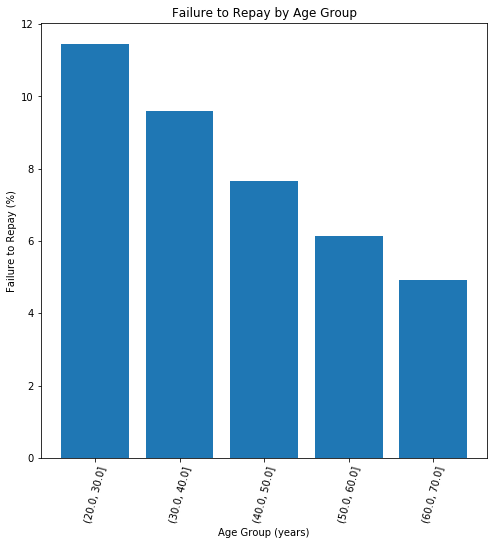

In [64]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### #10 目的変数間にDAYS_BIRTH（年齢）の違いがあるのか？

- 20-30才の借り手は60-70才の借り手に比べて支払いが困難になる可能性が倍高いことが上記のグラフで示されている。

In [83]:
#11 その他の相関係数を行列で表示して関係性を見る
credit_df['YEARS_BIRTH'] = credit_df['DAYS_BIRTH']/-365
select_correlations_data = credit_df.loc[:, ('TARGET', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                                        'YEARS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED')]
select_correlations = select_correlations_data.corr()
select_correlations

,TARGET,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,YEARS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED
TARGET,1.000000,0.055218,0.058899,0.060893,-0.078239,-0.178919,-0.160472,-0.155317,-0.044932
DAYS_LAST_PHONE_CHANGE,0.055218,1.000000,0.026022,0.025717,-0.082939,-0.075256,-0.195764,-0.132607,0.023032
REGION_RATING_CLIENT,0.058899,0.026022,1.000000,0.950842,-0.009361,-0.012903,-0.292895,-0.115341,0.032750
REGION_RATING_CLIENT_W_CITY,0.060893,0.025717,0.950842,1.000000,-0.008073,-0.012158,-0.288299,-0.115374,0.034624
YEARS_BIRTH,-0.078239,-0.082939,-0.009361,-0.008073,1.000000,0.205478,0.091996,0.600610,0.615864
EXT_SOURCE_3,-0.178919,-0.075256,-0.012903,-0.012158,0.205478,1.000000,0.109167,0.186846,0.113434
EXT_SOURCE_2,-0.160472,-0.195764,-0.292895,-0.288299,0.091996,0.109167,1.000000,0.213982,-0.020767
EXT_SOURCE_1,-0.155317,-0.132607,-0.115341,-0.115374,0.600610,0.186846,0.213982,1.000000,0.289848
DAYS_EMPLOYED,-0.044932,0.023032,0.032750,0.034624,0.615864,0.113434,-0.020767,0.289848,1.000000


Text(0.5,1,'Correlation matrix heatmap')

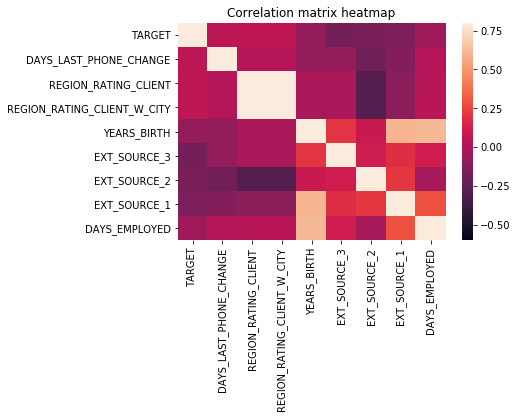

In [87]:
sns.heatmap(select_correlations, vmin=-0.6, vmax=0.8)
plt.title("Correlation matrix heatmap")

### #11 その他の相関係数を行列で表示して関係性を見る

- EXT_SOURCE_3/2/1はTARGETと負の関係を持っているので、EXT_SOURCE_3/2/1は高いとTARGETが低くなり、EXT_SOURCE_3/2/1は低いとTARGETが高くなる
- YEARS_BIRTHとDAYS_EMPLOYEDは相関があって妥当に捉えられる＞年数が上がれば就業年数も上がる。EXT_SOURCE_1とも相関があると見れる。EXT_SOURCE_1は何を示しているのか、具体的には分かり得ないが、年齢に依存するものかもしれないことがうかがえる
- REGION_RATING_CLIENT + REGION_RATING_CLIENT_W_CITYは、相関係数が９５％とほぼ同じ特徴量であることがわかる＞次元を減らす際にどちらかを削除できることがわかる

In [173]:
# 12 目的変数ごとに学歴を比較する

education_type_zeros = df_target_zeros.filter(like='EDUCATION').value_counts().to_list()/df_target_zeros.filter(like='EDUCATION').value_counts().sum()*100
education_type_one = df_target_one.filter(like='EDUCATION').value_counts().to_list()/df_target_one.filter(like='EDUCATION').value_counts().sum()*100

print(education_type_zeros, education_type_one)

[7.03490799e+01 2.50645593e+01 3.32701301e+00 1.20239418e+00
 5.69536518e-02] [7.86465257e+01 1.61490433e+01 3.51258812e+00 1.67975831e+00
 1.20845921e-02]


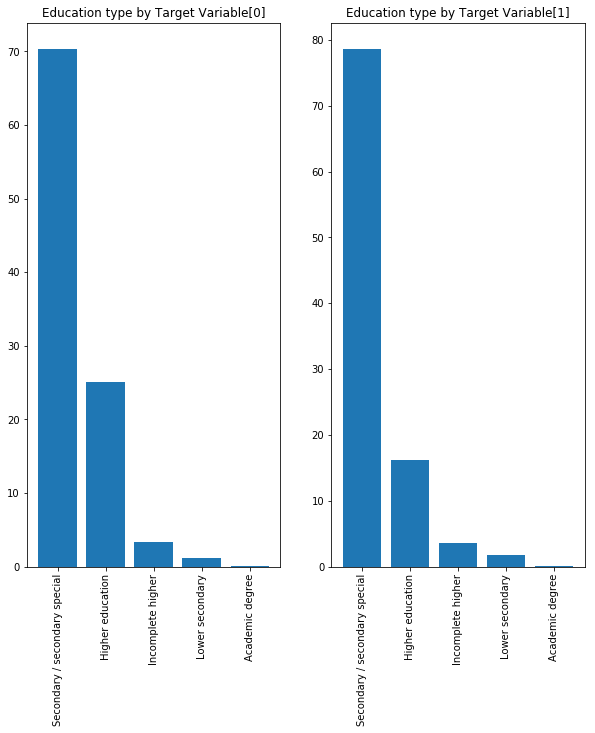

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title("Education type by Target Variable[0]")
ax2.set_title("Education type by Target Variable[1]")

labels = ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']

ax1.bar(labels, education_type_zeros)
ax2.bar(labels, education_type_one)

#Matplotlib doesn't attach the labels to the chart until the very end, when the chart is drawn. 
#So if you try to call get_xticklabels() before that, you get empty strings.
plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

### #12 目的変数ごとに学歴を比較する

- 両方の目的関数で学歴が高卒の借り手が多いいことが見える
- 返済が困難なグループでは、高卒の比率が高く(70%v78%)、大学卒の比率(25%v16%)が低いことが見える
- これは、学歴が返済能力に関係性を持っていることをあらわにしている。


In [175]:
family_type_zeros = df_target_zeros.filter(like='NAME_FAMILY_STATUS').value_counts().to_list()
family_type_zeros

[181582, 40987, 26814, 18150, 15151, 2]

In [176]:
family_type_one = df_target_one.filter(like='NAME_FAMILY_STATUS').value_counts().to_list()
family_type_one

[14850, 4457, 2961, 1620, 937]

In [177]:
df_target_zeros.filter(like='NAME_FAMILY_STATUS').value_counts().index.to_list()

[('Married',),
 ('Single / not married',),
 ('Civil marriage',),
 ('Separated',),
 ('Widow',),
 ('Unknown',)]

In [178]:
df_target_one.filter(like='NAME_FAMILY_STATUS').value_counts().index.to_list()

[('Married',),
 ('Single / not married',),
 ('Civil marriage',),
 ('Separated',),
 ('Widow',)]

In [179]:
# 13 目的変数ごとのクライアントの家族の状況を比較する
family_type_zeros = df_target_zeros.filter(like='NAME_FAMILY_STATUS').value_counts().to_list()/np.sum(family_type_zeros)*100
family_type_one = df_target_one.filter(like='NAME_FAMILY_STATUS').value_counts().to_list()/np.sum(family_type_one)*100

print(family_type_zeros, family_type_one)

[6.42345217e+01 1.44991262e+01 9.48543614e+00 6.42055142e+00
 5.35965700e+00 7.07498780e-04] [59.81873112 17.95367573 11.92749245  6.52567976  3.77442095]


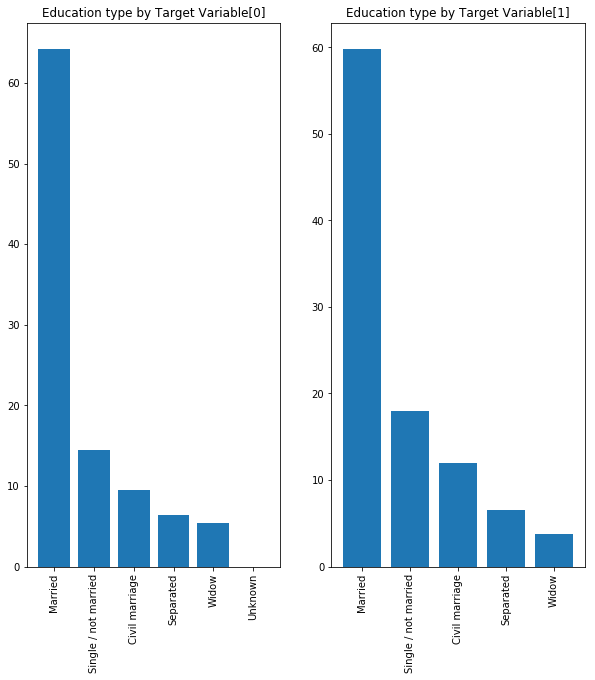

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title("Education type by Target Variable[0]")
ax2.set_title("Education type by Target Variable[1]")

labels_zeros = ['Married','Single / not married', 'Civil marriage','Separated','Widow','Unknown']
labels_one = ['Married','Single / not married', 'Civil marriage','Separated','Widow']

ax1.bar(labels_zeros, family_type_zeros)
ax2.bar(labels_one, family_type_one)

#Matplotlib doesn't attach the labels to the chart until the very end, when the chart is drawn. 
#So if you try to call get_xticklabels() before that, you get empty strings.
plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

### #13 目的変数ごとに学歴を比較する

- 両方の目的関数で結婚している借り手が多いいことが見える
- 返済が困難なグループでは、既婚の比率が低く(64%v60%)、独身の比率(15%v17%)が高いことが見える


In [191]:
# 14 family membersあたりの収入

credit_df['Income per person'] = credit_df['AMT_INCOME_TOTAL']/credit_df['CNT_FAM_MEMBERS']
credit_df['Income per person'].max()

39000000.0

In [315]:
credit_df['INCOME_BRACKET_BINNED'] = pd.cut(credit_df['Income per person'], bins = np.linspace(0, 500000, num = 11))
print(credit_df['INCOME_BRACKET_BINNED'].count())
income_per_fam_member_clean = credit_df['INCOME_BRACKET_BINNED'].dropna(axis=0,how='all').value_counts()
graph_data = income_per_fam_member_clean/income_per_fam_member_clean.sum()
updated = graph_data.sort_index()*100

306850


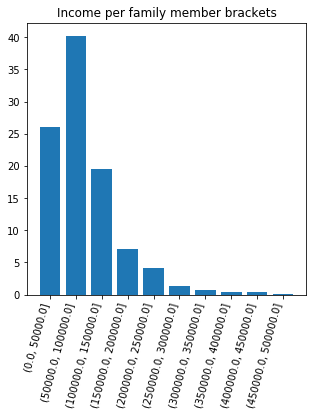

In [316]:
plt.figure(figsize=(5,5))
plt.title("Income per family member brackets")
plt.bar(updated.index.astype(str), updated)
plt.xticks(rotation=75, ha='right')
plt.show()

In [296]:
df_target_zeros['Income per person'] = df_target_zeros['AMT_INCOME_TOTAL']/df_target_zeros['CNT_FAM_MEMBERS']
df_target_one['Income per person'] = df_target_one['AMT_INCOME_TOTAL']/df_target_one['CNT_FAM_MEMBERS']
df_target_zeros

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income per person,INCOME_BRACKET_BINNED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,135000.0,"(100000.0, 150000.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67500.0,"(50000.0, 100000.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [305]:
df_target_zeros['INCOME_BRACKET_BINNED'] = pd.cut(df_target_zeros['Income per person'], bins = np.linspace(0, 500000, num = 11))
df_target_one['INCOME_BRACKET_BINNED'] = pd.cut(df_target_one['Income per person'], bins = np.linspace(0, 500000, num = 11))

print(df_target_zeros['INCOME_BRACKET_BINNED'].count())
print(df_target_one['INCOME_BRACKET_BINNED'].count())

income_per_fam_member_clean_zeros = df_target_zeros['INCOME_BRACKET_BINNED'].dropna(axis=0,how='all').value_counts()
income_per_fam_member_clean_one = df_target_one['INCOME_BRACKET_BINNED'].dropna(axis=0,how='all').value_counts()

graph_data_zeros = income_per_fam_member_clean_zeros/income_per_fam_member_clean_zeros.sum()*100
graph_data_one = income_per_fam_member_clean_one/income_per_fam_member_clean_one.sum()*100

final_zeros = graph_data_zeros.sort_index()
final_one = graph_data_one.sort_index()

282070
24780


/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


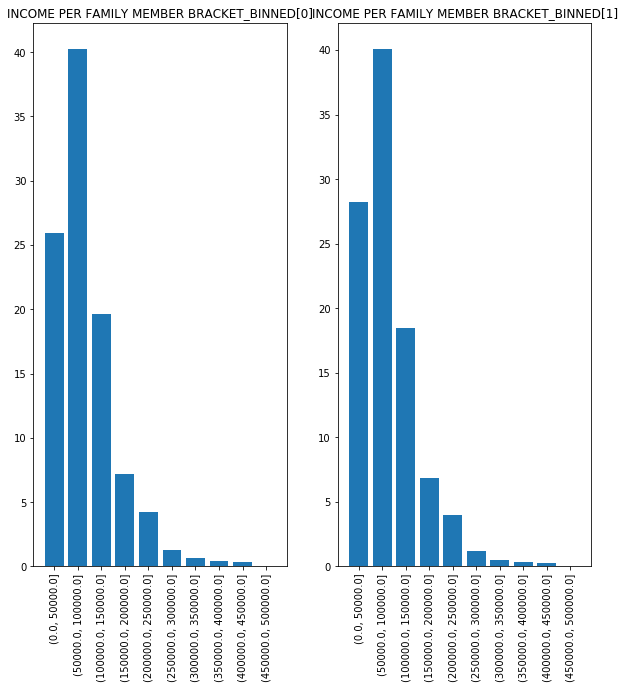

In [306]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title("INCOME PER FAMILY MEMBER BRACKET_BINNED[0]")
ax2.set_title("INCOME PER FAMILY MEMBER BRACKET_BINNED[1]")

labels = updated.index.astype(str)

ax1.bar(labels, final_zeros)
ax2.bar(labels, final_one)

#Matplotlib doesn't attach the labels to the chart until the very end, when the chart is drawn. 
#So if you try to call get_xticklabels() before that, you get empty strings.
plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

### #14 family members一人あたりの収入

- ４０％近くの借り手は、家族1人あたり５万から１０万ドル（約：５００万〜１０００万円）の収入がある
- 返済が困難なグループでは、借り手の約27.5%が０−５万ドルの枠に属したのに対して、その他のグループでは25％強だった。分布の違いを見てもそれほど大きな差は見られなかった

In [309]:
# Failure to pay % per income bracket
income_group = credit_df['TARGET'].groupby(credit_df['INCOME_BRACKET_BINNED']).mean()*100
income_group

INCOME_BRACKET_BINNED
(0.0, 50000.0]          8.729822
(50000.0, 100000.0]     8.045558
(100000.0, 150000.0]    7.638553
(150000.0, 200000.0]    7.763224
(200000.0, 250000.0]    7.723356
(250000.0, 300000.0]    7.345912
(300000.0, 350000.0]    6.126387
(350000.0, 400000.0]    6.565657
(400000.0, 450000.0]    5.970149
(450000.0, 500000.0]    6.451613
Name: TARGET, dtype: float64

<Figure size 864x864 with 0 Axes>

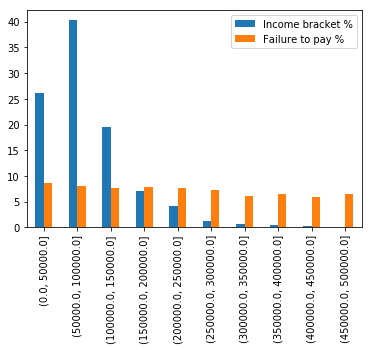

In [323]:
plt.figure(figsize = (12, 12))

# Graph the age bins and the average of the target as a bar plot
combine_both = pd.concat([updated, income_group], axis=1)
new = combine_both.rename(columns={'TARGET': 'Failure to pay %', 'INCOME_BRACKET_BINNED': 'Income bracket %'})

new .plot(kind='bar', secondary_y = 'Failure to pay')
plt.show()

### #15 family members一人あたりの収入枠別の返済延滞率

- family members一人あたりの収入枠別の統計を見ると、（収入枠に関わりなく）全ての枠において約8％の返済延滞率があるとわかった。
- Failure to pay %は、family members一人あたりの収入が増えることによって、減るものであると考えられるので、上記の結果は意外だ。